Basado en: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

Veremos el thresholding adaptativo y Otsu.

# Adaptativo
En un notebook anterior, usamos un valor global como umbral. Pero esto podría no ser bueno en todos los casos; por ejemplo, si una imagen tiene diferentes condiciones de iluminación en diferentes áreas. 

En ese caso, el thresholding (o umbral) adaptativo puede ayudar. Aquí, el algoritmo determina el umbral para un píxel en función de una pequeña región a su alrededor. Entonces obtenemos diferentes umbrales para diferentes regiones de la misma imagen, lo que da mejores resultados para imágenes con iluminación variable.

In [26]:
! curl -L https://thumbs.dreamstime.com/b/sudoku-puzzle-863979.jpg -o images/sudoku.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 72084  100 72084    0     0  1150k      0 --:--:-- --:--:-- --:--:-- 1234k


In [27]:
! pip install opencv-python


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


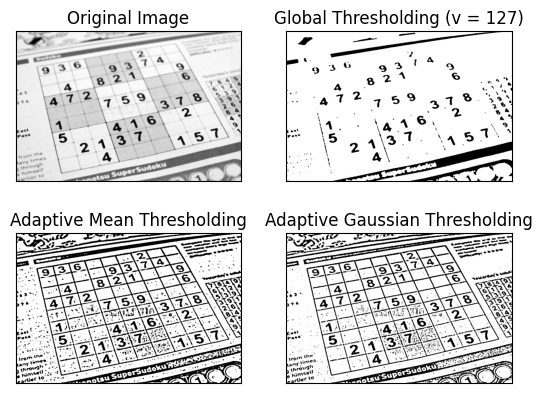

In [28]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('images/sudoku.jpg',cv.IMREAD_GRAYSCALE)
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

# Otsu thresholding

En el umbral global, usamos un valor elegido arbitrariamente como umbral. En cambio, el método de Otsu evita tener que elegir un valor y lo determina automáticamente.

Considere una imagen con solo dos valores de imagen distintos (imagen bimodal), donde el histograma solo consistiría en dos picos. Un buen umbral estaría en el medio de esos dos valores. De manera similar, el método de Otsu determina un valor de umbral global óptimo a partir del histograma de la imagen.

In [29]:
! curl https://deaenij3kiw8r.cloudfront.net/system/users/avatars/224173/artist_profile/production-8c074eb606f1a58588de50372709a196-penum.png -o images/avatar.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  144k  100  144k    0     0   768k      0 --:--:-- --:--:-- --:--:--  777k


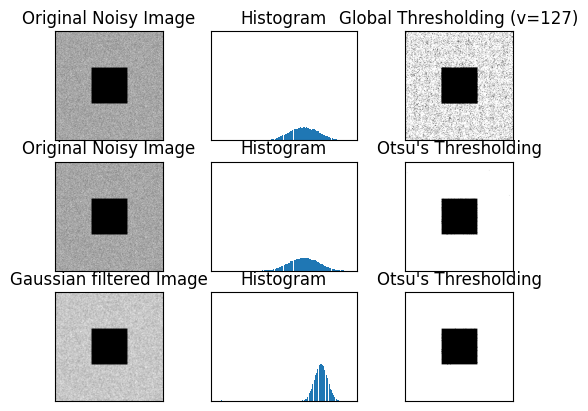

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('images/avatar.png',0)
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()